## Breast Cancer Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# importing the dataset
data = pd.read_csv(r"D:\IITR\ML Project\Nexus\Breast Cancer Prediction\archive\data.csv")

In [3]:
# having a breif overview of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
# datatypes of different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Preprocessing

In [6]:
# mapping categorical data of diagnosis into float datatypes as 0 and 1
replacements = {'M': 0, 'B': 1}

data['diagnosis'] = data['diagnosis'].replace(replacements).astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_24608\3744515954.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace(replacements).astype(float)


In [7]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
data['diagnosis'].value_counts()

diagnosis
1.0    357
0.0    212
Name: count, dtype: int64

In [9]:
# data statistics
data.describe(exclude='int')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Handling Missing Values

In [10]:
# looking for missing values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# dropped the entire column as whole column had no values at all
data.drop('Unnamed: 32', axis=1, inplace = True)

In [12]:
data.shape

(569, 32)

In [13]:
%matplotlib inline

In [14]:
pip install seaborn

## Handling Outliers

In [15]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

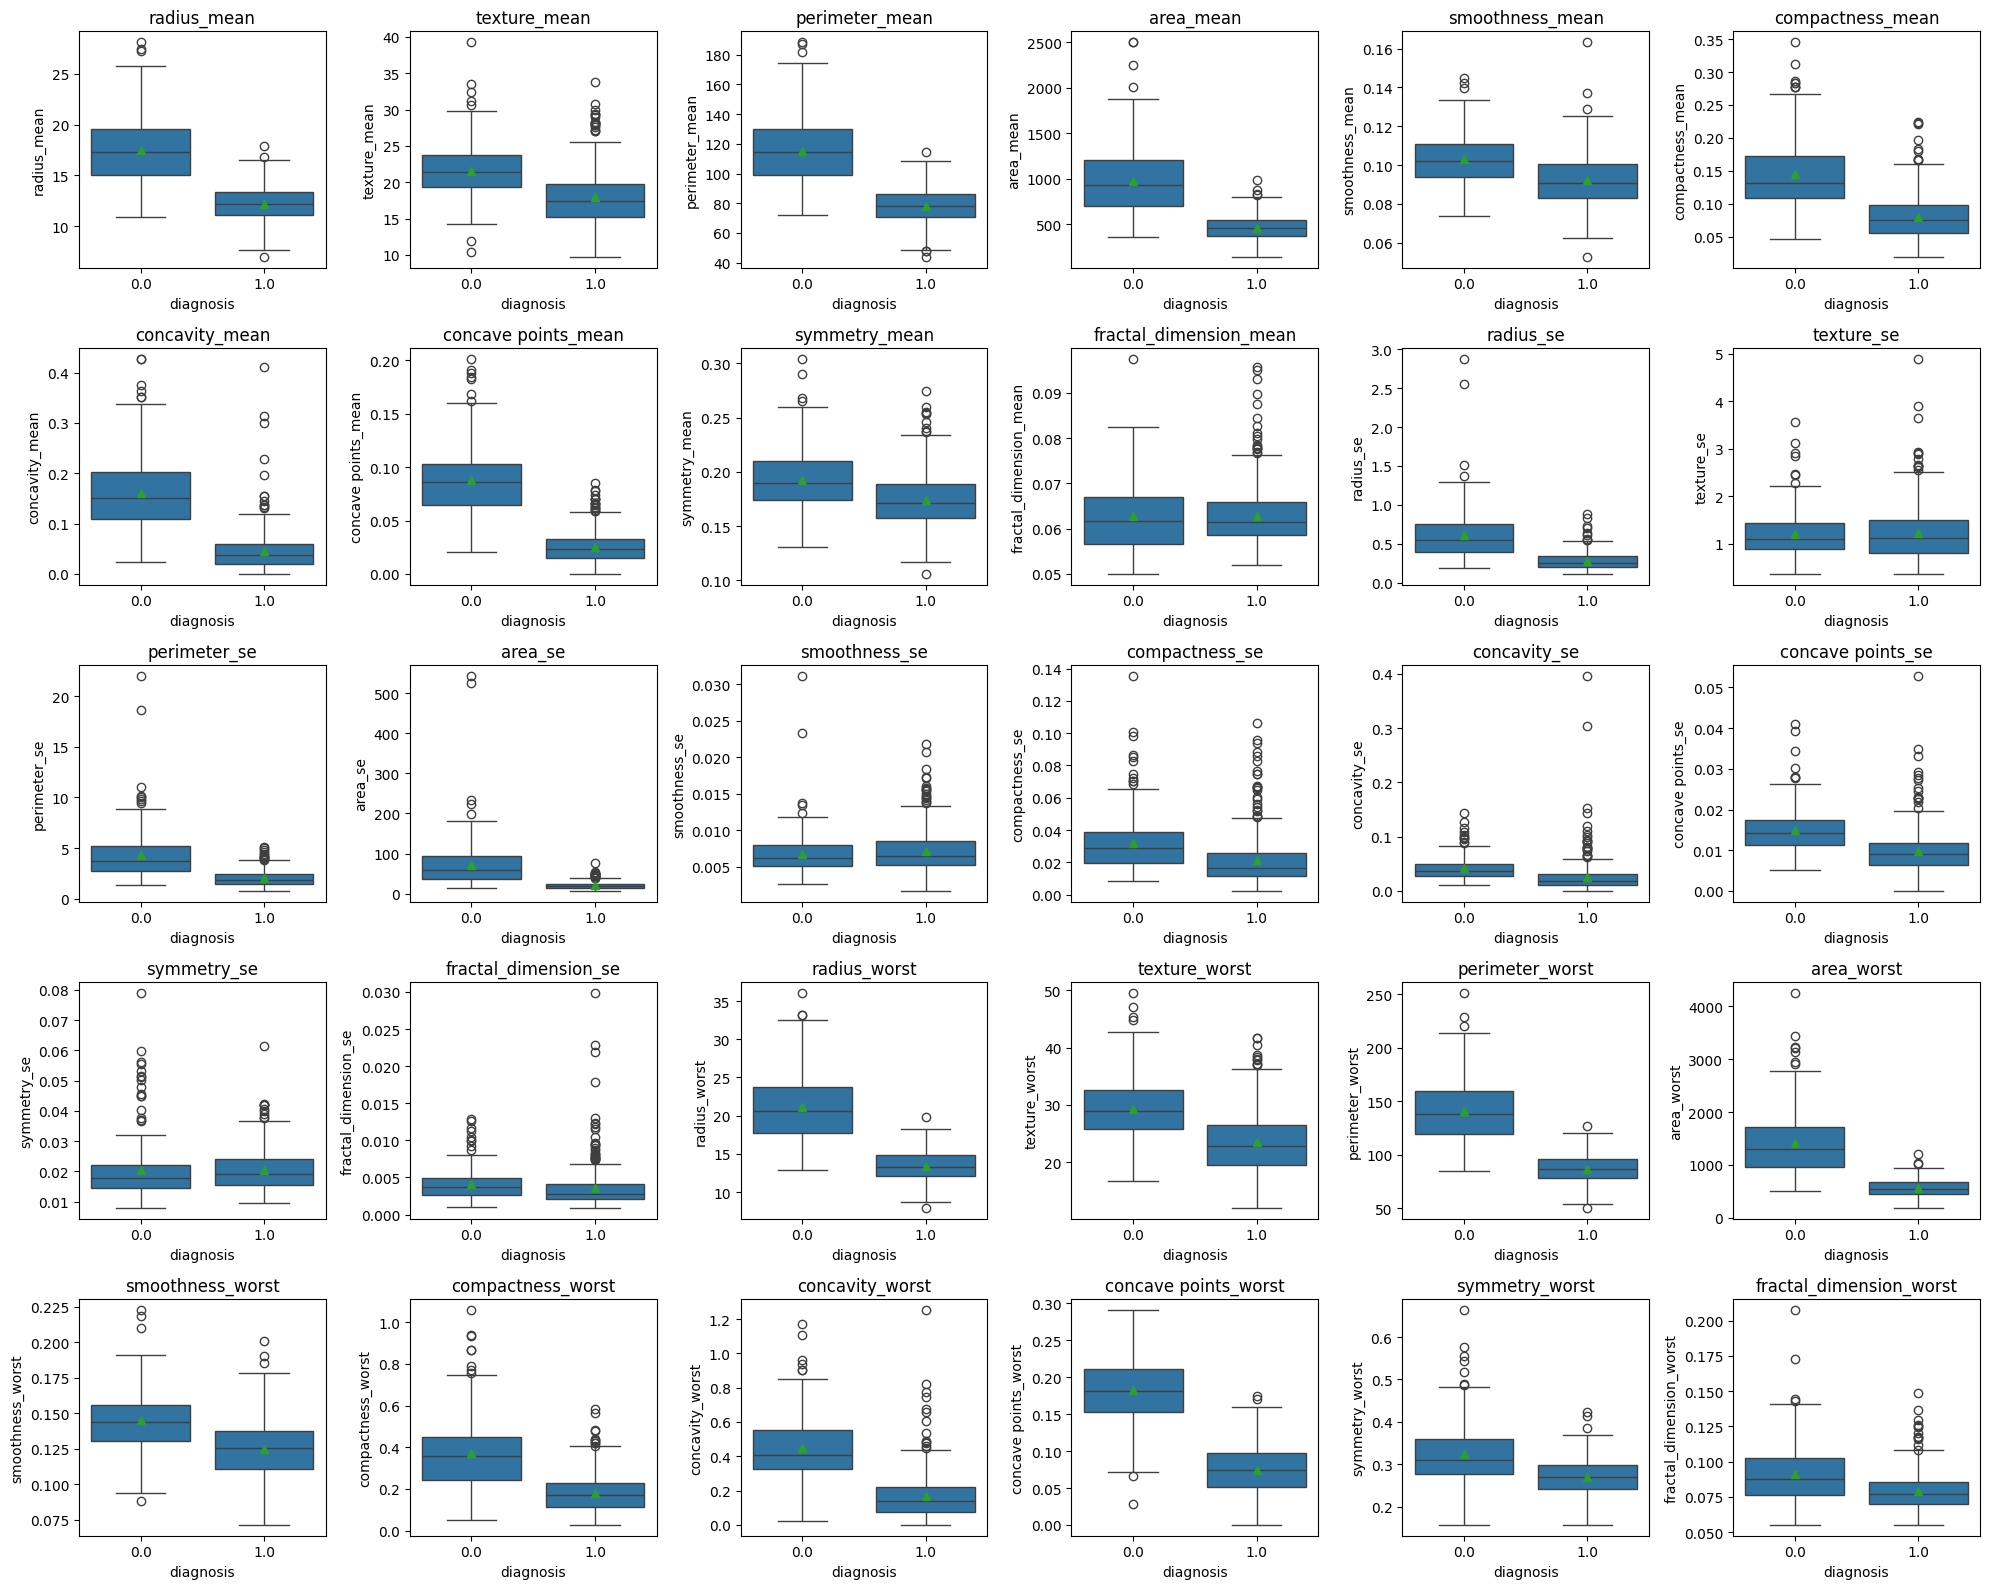

In [16]:
# plotting box plots inorder to visualize the outliers in the dataset

numerical_columns = data.select_dtypes(include=np.number).columns.tolist()[2:]

# Adjust rows and columns for better layout
rows = 5  
cols = (len(numerical_columns) + 3) // 5 

plt.figure(figsize=(20, 16)) 

# Loop through each numerical column and create a boxplot in a subplot
for i, col in enumerate(numerical_columns):
    
    # subplot position based on row and column index
    ax = plt.subplot(rows, cols, i + 1)

    # Create the boxplot using seaborn
    sns.boxplot(
        x="diagnosis",
        y=col,
        showmeans=True,
        data=data,
        ax=ax,  # Specify the subplot to use
    )

    plt.title(col)

# Adjusting layout to prevent overlapping elements
plt.tight_layout()

plt.show()

In [17]:
# looking for those attributes (columns) only that has more than 3% outliers

def calculate_iqr_outliers(data, numerical_columns, threshold=3):

  numerical_columns = numerical_columns[2:]

  for col in numerical_columns:
      
    # Calculating InterQuantile Range
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    # Calculating lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Counting outliers
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

    # Calculating and printing percentage (if above threshold)
    outlier_percentage = (outliers / len(data)) * 100
    if outlier_percentage > threshold:
      print(f"Column: {col} - Outlier Percentage: {outlier_percentage:.2f}%")

numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# Calculating and printing IQR outliers with threshold of 3%
calculate_iqr_outliers(data.copy(), numerical_columns.copy(), threshold=3)  # Avoid modifying original data

Column: area_mean - Outlier Percentage: 4.39%
Column: concavity_mean - Outlier Percentage: 3.16%
Column: radius_se - Outlier Percentage: 6.68%
Column: texture_se - Outlier Percentage: 3.51%
Column: perimeter_se - Outlier Percentage: 6.68%
Column: area_se - Outlier Percentage: 11.42%
Column: smoothness_se - Outlier Percentage: 5.27%
Column: compactness_se - Outlier Percentage: 4.92%
Column: concavity_se - Outlier Percentage: 3.87%
Column: concave points_se - Outlier Percentage: 3.34%
Column: symmetry_se - Outlier Percentage: 4.75%
Column: fractal_dimension_se - Outlier Percentage: 4.92%
Column: area_worst - Outlier Percentage: 6.15%
Column: symmetry_worst - Outlier Percentage: 4.04%
Column: fractal_dimension_worst - Outlier Percentage: 4.22%


In [18]:
# We went for Winsorization i.e. replacing extreme outliers with values at the tails of the distribution
# This preserves data size while reducing the influence of outliers

def winsorize_dataframe(data, numerical_columns, percentile=95, lower_percentile=5):

  numerical_columns = numerical_columns[2:]

  winsorized_data = data.copy()

  for col in numerical_columns:
      
    # Calculating upper and lower bounds
    upper_bound = winsorized_data[col].quantile(percentile / 100)
    lower_bound = winsorized_data[col].quantile(lower_percentile / 100)

    # Cap outliers at bounds
    winsorized_data.loc[winsorized_data[col] > upper_bound, col] = upper_bound
    winsorized_data.loc[winsorized_data[col] < lower_bound, col] = lower_bound

  return winsorized_data

numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# Winsorize data with default percentiles (95th and 5th)
winsorized_data = winsorize_dataframe(data.copy(), numerical_columns.copy())

In [19]:
winsorized_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0.0,17.9900,13.088,122.800,1001.00,0.118400,0.20870,0.243020,0.125740,...,25.380,17.33,171.640,2009.60,0.162200,0.564120,0.68238,0.236920,0.40616,0.11890
1,842517,0.0,20.5700,17.770,132.900,1309.80,0.084740,0.07864,0.086900,0.070170,...,24.990,23.41,158.800,1956.00,0.123800,0.186600,0.24160,0.186000,0.27500,0.08902
2,84300903,0.0,19.6900,21.250,130.000,1203.00,0.109600,0.15990,0.197400,0.125740,...,23.570,25.53,152.500,1709.00,0.144400,0.424500,0.45040,0.236920,0.36130,0.08758
3,84348301,0.0,11.4200,20.380,77.580,386.10,0.118780,0.20870,0.241400,0.105200,...,14.910,26.50,98.870,567.70,0.171840,0.564120,0.68238,0.236920,0.40616,0.11952
4,84358402,0.0,20.2900,14.340,135.100,1297.00,0.100300,0.13280,0.198000,0.104300,...,22.540,16.67,152.200,1575.00,0.137400,0.205000,0.40000,0.162500,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0.0,20.5760,22.390,135.820,1309.80,0.111000,0.11590,0.243020,0.125740,...,25.450,26.40,166.100,2009.60,0.141000,0.211300,0.41070,0.221600,0.21270,0.07115
565,926682,0.0,20.1300,27.150,131.200,1261.00,0.097800,0.10340,0.144000,0.097910,...,23.690,36.30,155.000,1731.00,0.116600,0.192200,0.32150,0.162800,0.25720,0.06637
566,926954,0.0,16.6000,27.150,108.300,858.10,0.084550,0.10230,0.092510,0.053020,...,18.980,34.12,126.700,1124.00,0.113900,0.309400,0.34030,0.141800,0.22180,0.07820
567,927241,0.0,20.5760,27.150,135.820,1265.00,0.117800,0.20870,0.243020,0.125740,...,25.640,36.30,171.640,1821.00,0.165000,0.564120,0.68238,0.236920,0.40616,0.11952


In [20]:
# checking for the further possible outliers
numerical_columns = winsorized_data.select_dtypes(include=np.number).columns.tolist()

# Calculate and print IQR outliers with threshold of more than 3%
calculate_iqr_outliers(winsorized_data.copy(), numerical_columns.copy(), threshold=3)  # Avoid modifying original data

Column: radius_se - Outlier Percentage: 6.68%
Column: perimeter_se - Outlier Percentage: 6.68%
Column: area_se - Outlier Percentage: 11.42%
Column: smoothness_se - Outlier Percentage: 5.27%
Column: area_worst - Outlier Percentage: 6.15%


In [21]:
# we will simply drop the columns having outliers more than 5%
winsorized_data_dropped = winsorized_data.drop(['radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'area_worst'], axis=1)

In [22]:
winsorized_data_dropped

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0.0,17.9900,13.088,122.800,1001.00,0.118400,0.20870,0.243020,0.125740,...,0.006193,25.380,17.33,171.640,0.162200,0.564120,0.68238,0.236920,0.40616,0.11890
1,842517,0.0,20.5700,17.770,132.900,1309.80,0.084740,0.07864,0.086900,0.070170,...,0.003532,24.990,23.41,158.800,0.123800,0.186600,0.24160,0.186000,0.27500,0.08902
2,84300903,0.0,19.6900,21.250,130.000,1203.00,0.109600,0.15990,0.197400,0.125740,...,0.004571,23.570,25.53,152.500,0.144400,0.424500,0.45040,0.236920,0.36130,0.08758
3,84348301,0.0,11.4200,20.380,77.580,386.10,0.118780,0.20870,0.241400,0.105200,...,0.007960,14.910,26.50,98.870,0.171840,0.564120,0.68238,0.236920,0.40616,0.11952
4,84358402,0.0,20.2900,14.340,135.100,1297.00,0.100300,0.13280,0.198000,0.104300,...,0.005115,22.540,16.67,152.200,0.137400,0.205000,0.40000,0.162500,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0.0,20.5760,22.390,135.820,1309.80,0.111000,0.11590,0.243020,0.125740,...,0.004239,25.450,26.40,166.100,0.141000,0.211300,0.41070,0.221600,0.21270,0.07115
565,926682,0.0,20.1300,27.150,131.200,1261.00,0.097800,0.10340,0.144000,0.097910,...,0.002498,23.690,36.30,155.000,0.116600,0.192200,0.32150,0.162800,0.25720,0.06637
566,926954,0.0,16.6000,27.150,108.300,858.10,0.084550,0.10230,0.092510,0.053020,...,0.003892,18.980,34.12,126.700,0.113900,0.309400,0.34030,0.141800,0.22180,0.07820
567,927241,0.0,20.5760,27.150,135.820,1265.00,0.117800,0.20870,0.243020,0.125740,...,0.006185,25.640,36.30,171.640,0.165000,0.564120,0.68238,0.236920,0.40616,0.11952


In [23]:
df = winsorized_data_dropped.copy()

## Train_Test_Split

In [24]:
# Using StratifiedShuffleSplit inorder to ensure even distribution of the diagnosis characterisitc

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df['diagnosis']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [25]:
strat_train_set['diagnosis'].value_counts()

diagnosis
1.0    285
0.0    170
Name: count, dtype: int64

In [26]:
strat_test_set['diagnosis'].value_counts()

diagnosis
1.0    72
0.0    42
Name: count, dtype: int64

In [27]:
df_train = strat_train_set.copy()
df_test = strat_test_set.copy()

## Feature Selection

## Looking for Correlations

In [28]:
df_train.drop('id', axis=1, inplace= True)

In [29]:
corr_matrix = df_train.corr()
corr_matrix['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
symmetry_se                0.058905
texture_se                 0.014665
fractal_dimension_mean    -0.012569
fractal_dimension_se      -0.146502
compactness_se            -0.333413
fractal_dimension_worst   -0.337115
symmetry_mean             -0.365651
smoothness_mean           -0.397786
concavity_se              -0.426255
texture_mean              -0.435054
smoothness_worst          -0.435506
symmetry_worst            -0.447086
texture_worst             -0.462376
concave points_se         -0.473437
compactness_worst         -0.629696
compactness_mean          -0.632293
concavity_worst           -0.705854
concavity_mean            -0.741743
area_mean                 -0.753048
radius_mean               -0.755359
perimeter_mean            -0.771304
radius_worst              -0.802566
concave points_mean       -0.809776
concave points_worst      -0.811730
perimeter_worst           -0.812695
Name: diagnosis, dtype: float64

## Trying out Attribute Combinations

In [30]:
df_train.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [31]:
df_train['compact_smooth_mean'] = df_train['smoothness_mean']/df_train['compactness_mean']

In [32]:
# the new attribute gave decent positive correlation
corr_matrix = df_train.corr()
corr_matrix['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
compact_smooth_mean        0.579561
symmetry_se                0.058905
texture_se                 0.014665
fractal_dimension_mean    -0.012569
fractal_dimension_se      -0.146502
compactness_se            -0.333413
fractal_dimension_worst   -0.337115
symmetry_mean             -0.365651
smoothness_mean           -0.397786
concavity_se              -0.426255
texture_mean              -0.435054
smoothness_worst          -0.435506
symmetry_worst            -0.447086
texture_worst             -0.462376
concave points_se         -0.473437
compactness_worst         -0.629696
compactness_mean          -0.632293
concavity_worst           -0.705854
concavity_mean            -0.741743
area_mean                 -0.753048
radius_mean               -0.755359
perimeter_mean            -0.771304
radius_worst              -0.802566
concave points_mean       -0.809776
concave points_worst      -0.811730
perimeter_worst           -0.812695
Name: diagnosis, dtype: floa

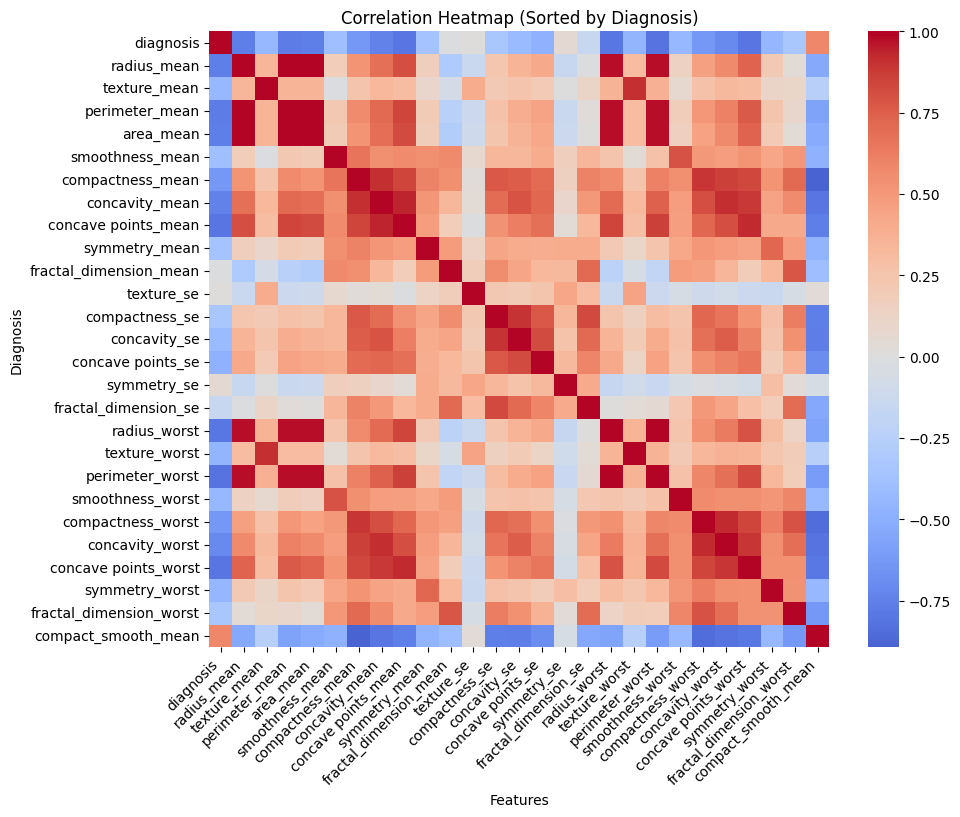

In [33]:
# Plotting correlations in heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap="coolwarm", center=0)

plt.title("Correlation Heatmap (Sorted by Diagnosis)")
plt.xlabel("Features")
plt.ylabel("Diagnosis")
plt.xticks(rotation=45, ha="right")
plt.show()

In [34]:
# Training Dataset
X_train = df_train.drop(['diagnosis', 'compact_smooth_mean'], axis=1)
Y_train = df_train['diagnosis'].copy()

In [35]:
# Testing Dataset
X_test = df_test.drop(['diagnosis', 'id'], axis=1)
Y_test = df_test['diagnosis'].copy()

## Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std scaler', StandardScaler())
])

In [37]:
# Passing training dataset into our pipeline
X_tr = my_pipeline.fit_transform(X_train)

In [38]:
X_tr.shape

(455, 25)

In [39]:
Y_train.shape

(455,)

In [40]:
# importing Support Vector Machine (SVM) model
from sklearn.svm import SVC

In [41]:
# defining our model and fitting processed training data in it
model = SVC()
model.fit(X_tr, Y_train)

SVC()

In [42]:
# prediciting output through our model
Y_train_pred = model.predict(X_tr)

## Evaluating the model

In [43]:
# importing various evaluation metrics for our model such as accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve
# using these evaluation metrics to check our model performance on training dataset

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

model_train_accuracy = accuracy_score(Y_train, Y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(Y_train, Y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(Y_train, Y_train_pred) # Calculate Precision
model_train_recall = recall_score(Y_train, Y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(Y_train, Y_train_pred)

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))


Model performance for Training set
- Accuracy: 0.9802
- F1 score: 0.9802
- Precision: 0.9759
- Recall: 0.9930
- Roc Auc Score: 0.9759


## Using better evaluation technique - Cross Validation

In [44]:
# for better evaluation techniques we went for Cross_validation on training dataset having 10 folds
from sklearn.model_selection import cross_val_score

scoring_parameters = ['accuracy_score', 'f1-score', 'precision_score', 'recall_score', 'roc_auc_score']

# Perform cross-validation
cv_results = cross_val_score(model, X_tr, Y_train, cv=10)

print("Scores across all CV folds:")
for metric, score in zip(scoring_parameters, cv_results):
  print(f"{metric}: {score:.4f}")  # Print score with 4 decimal places

Scores across all CV folds:
accuracy_score: 0.9565
f1-score: 0.9348
precision_score: 1.0000
recall_score: 1.0000
roc_auc_score: 0.9130


## Testing the model on test data

In [45]:
# Finally testing our model on Testing Dataset and evaluating it using evaluation metrics used earlier

X_te = my_pipeline.transform(X_test)
Y_test_pred = model.predict(X_te)

model_test_accuracy = accuracy_score(Y_test, Y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(Y_test, Y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(Y_test, Y_test_pred) # Calculate Precision
model_test_recall = recall_score(Y_test, Y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(Y_test, Y_test_pred)

print('Model performance for Testing set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


Model performance for Testing set
- Accuracy: 0.9737
- F1 score: 0.9737
- Precision: 0.9859
- Recall: 0.9722
- Roc Auc Score: 0.9742
